In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,r2_score
import warnings
warnings.filterwarnings("ignore", message="X has feature names")


In [2]:
columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","last_flag", "attack"]


In [3]:
network_data=pd.read_csv('c:/Users/adith/OneDrive/Desktop/data/sub.xlsx')

In [4]:
network_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,anomaly
1,0,tcp,http,REJ,0,0,0,0,0,0,...,129,1.00,0.00,0.02,0.15,0.0,0.01,0.93,0.87,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,3,0.01,0.06,0.00,0.00,1.0,1.00,0.00,0.00,anomaly
3,0,udp,domain_u,SF,45,114,0,0,0,0,...,12,0.44,0.11,0.04,0.00,0.0,0.00,0.00,0.00,normal
4,0,tcp,http,S0,0,0,0,0,0,0,...,12,1.00,0.00,0.08,0.00,1.0,1.00,0.00,0.00,anomaly


In [5]:
network_data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
3995,1,tcp,smtp,SF,0,89,0,0,0,0,...,100,0.17,1.00,0.17,0.03,0.0,0.00,0.83,0.0,anomaly
3996,0,tcp,ftp_data,SF,879,0,0,0,0,0,...,102,0.40,0.04,0.42,0.00,0.0,0.01,0.00,0.0,normal
3997,0,tcp,private,S0,0,0,0,0,0,0,...,17,0.07,0.08,0.00,0.00,1.0,1.00,0.00,0.0,anomaly
3998,0,tcp,private,REJ,0,0,0,0,0,0,...,7,0.03,0.07,0.00,0.00,0.0,0.00,1.00,1.0,anomaly
3999,0,tcp,smtp,SF,1053,329,0,0,0,0,...,177,0.69,0.06,0.01,0.01,0.0,0.00,0.00,0.0,normal


In [6]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     4000 non-null   int64  
 1   protocol_type                4000 non-null   object 
 2   service                      4000 non-null   object 
 3   flag                         4000 non-null   object 
 4   src_bytes                    4000 non-null   int64  
 5   dst_bytes                    4000 non-null   int64  
 6   land                         4000 non-null   int64  
 7   wrong_fragment               4000 non-null   int64  
 8   urgent                       4000 non-null   int64  
 9   hot                          4000 non-null   int64  
 10  num_failed_logins            4000 non-null   int64  
 11  logged_in                    4000 non-null   int64  
 12  num_compromised              4000 non-null   int64  
 13  root_shell        

In [7]:
network_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4000.000000,4.000000e+03,4.000000e+03,4000.0,4000.000000,4000.0,4000.00000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,221.432500,1.074366e+04,4.870005e+03,0.0,0.021250,0.0,0.19925,0.002500,0.399000,0.093750,...,180.474750,116.227500,0.525275,0.080503,0.144045,0.032830,0.295240,0.290605,0.113900,0.114902
std,2203.465327,2.009852e+05,1.180513e+05,0.0,0.244568,0.0,2.36547,0.077429,0.489754,3.451295,...,99.532289,111.183102,0.449881,0.184620,0.306320,0.116758,0.450372,0.451604,0.302878,0.313048
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,77.750000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,255.000000,62.000000,0.530000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.820000e+02,6.160000e+02,0.0,0.000000,0.0,0.00000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.020000,1.000000,1.000000,0.000000,0.000000
max,41476.000000,7.248552e+06,5.150772e+06,0.0,3.000000,0.0,77.00000,4.000000,1.000000,157.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
network_data.shape

(4000, 42)

In [9]:
network_data.isnull().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [10]:
print(f"Number of duplicate rows: {network_data.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: xlabel='class'>

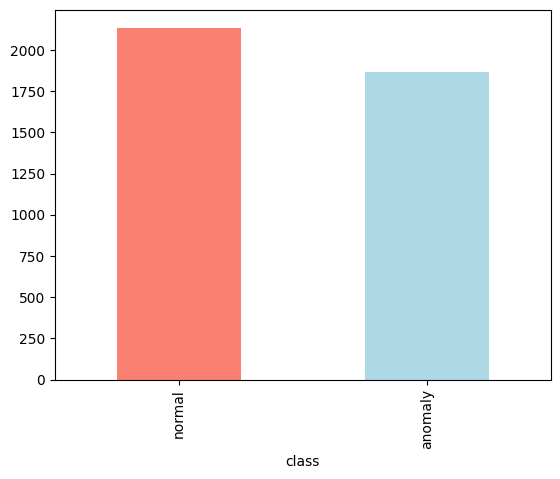

In [11]:
network_data["class"].value_counts().plot(kind='bar', color=["salmon","lightblue"])  

In [12]:

def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(network_data)

In [13]:
network_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,14,8,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0
1,0,1,22,0,0,0,0,0,0,0,...,129,1.00,0.00,0.02,0.15,0.0,0.01,0.93,0.87,1
2,0,1,44,4,0,0,0,0,0,0,...,3,0.01,0.06,0.00,0.00,1.0,1.00,0.00,0.00,0
3,0,2,11,8,45,114,0,0,0,0,...,12,0.44,0.11,0.04,0.00,0.0,0.00,0.00,0.00,1
4,0,1,22,4,0,0,0,0,0,0,...,12,1.00,0.00,0.08,0.00,1.0,1.00,0.00,0.00,0


In [14]:
X = network_data.drop(columns=['class'])
y = network_data['class']

In [15]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit( X , y)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

In [16]:
['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

In [17]:
X= X[selected_features]

In [18]:
X.head()

,protocol_type,flag,src_bytes,dst_bytes,count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate
0,0,8,1032,0,13,1.00,0.00,255,1.00,1.00
1,1,0,0,0,12,1.00,0.00,129,1.00,0.02
2,1,4,0,0,90,0.21,0.06,3,0.01,0.00
3,2,8,45,114,2,1.00,0.00,12,0.44,0.04
4,1,4,0,0,12,1.00,0.00,12,1.00,0.08


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape


(2800, 10)

In [20]:
X_test.shape


(1200, 10)

In [21]:
y_train.shape


(2800,)

In [22]:

y_test.shape

(1200,)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
model1=KNeighborsClassifier()
model2 = LogisticRegression()
model3 = DecisionTreeClassifier()

In [25]:
print('KNN Model:')

#Train the model
model1.fit(X_train_scaled, y_train)

# Evaluate using k-fold cross-validation (k=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model1, X_train_scaled, y_train, cv=kfold)
print(f"Accuracy (k-fold cross-validation): {np.mean(cv_scores):.4f}")


#Test the model
y_pred_knn = model1.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy(KNN): {accuracy_knn}')

KNN Model:


Accuracy (k-fold cross-validation): 0.9729
Accuracy(KNN): 0.9775


Confusion Matrix:
[[552  17]
 [ 10 621]]


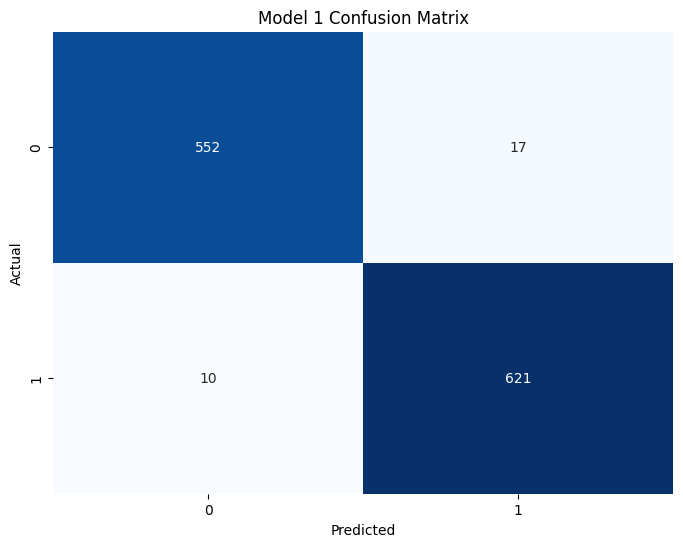

In [26]:
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Model 1 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
TN, FP, FN, TP = cm.ravel()
 # Precision: TP / (TP + FP)
precision = TP / (TP + FP)

    # Recall: TP / (TP + FN)
recall = TP / (TP + FN)

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
f1 = 2 * (precision * recall) / (precision + recall)




print("Precision:",precision)
print("Rcall:",recall)
print("F_score:",f1)






Precision: 0.9733542319749217
Rcall: 0.9841521394611727
F_score: 0.9787234042553192


In [28]:
print('Logistic Regression:')
# Train the model
model2.fit(X_train_scaled, y_train)
# Evaluate using k-fold cross-validation (k=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model2, X_train_scaled, y_train, cv=kfold)
print(f"Accuracy (k-fold cross-validation): {np.mean(cv_scores):.4f}")


#Test the model
y_pred = model2.predict(X_test_scaled)
# Calculate evaluation metrics
accuracy_lg = accuracy_score(y_test, y_pred)
print(f"Accuracy (test set): {accuracy_lg:.4f}")

Logistic Regression:


Accuracy (k-fold cross-validation): 0.9475
Accuracy (test set): 0.9367


Confusion Matrix:


[[520  49]
 [ 27 604]]


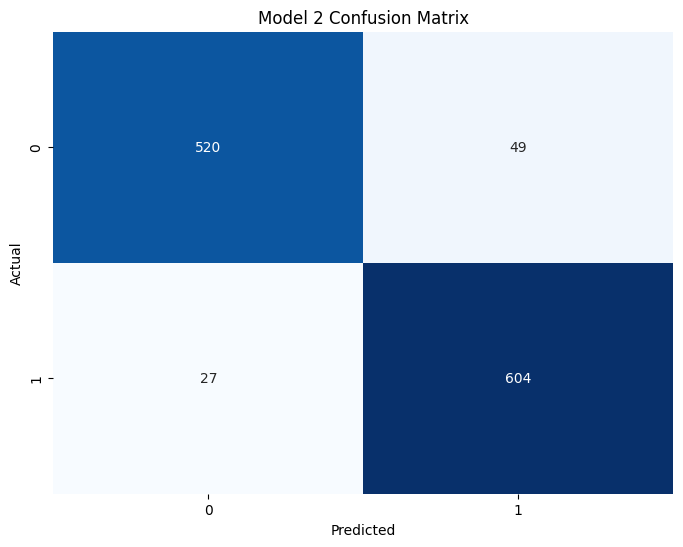

In [29]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Model 2 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [30]:
TN, FP, FN, TP = cm.ravel()
 # Precision: TP / (TP + FP)
precision = TP / (TP + FP)

    # Recall: TP / (TP + FN)
recall = TP / (TP + FN)

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
f1 = 2 * (precision * recall) / (precision + recall)




print("Precision:",precision)
print("Recall:",recall)
print("F_score:",f1)

# Calculate R-squared error
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (test set): {r_squared:.4f}")


Precision: 0.9249617151607963
Recall: 0.9572107765451664
F_score: 0.9408099688473519
R-squared (test set): 0.7460


In [31]:
print("\nDesicion Tree")
# Train the model
model3.fit(X_train_scaled, y_train)

# Evaluate using k-fold cross-validation (k=5)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model1, X_train_scaled, y_train, cv=kfold)
print(f"Accuracy (k-fold cross-validation): {np.mean(cv_scores):.4f}")


# Test the model
y_pred = model3.predict(X_test_scaled)

accuracy_dt= accuracy_score(y_test, y_pred)
print(f"Accuracy (test set): {accuracy_dt:.4f}")




Desicion Tree


Accuracy (k-fold cross-validation): 0.9729
Accuracy (test set): 0.9833


Confusion Matrix:
[[556  13]
 [  7 624]]


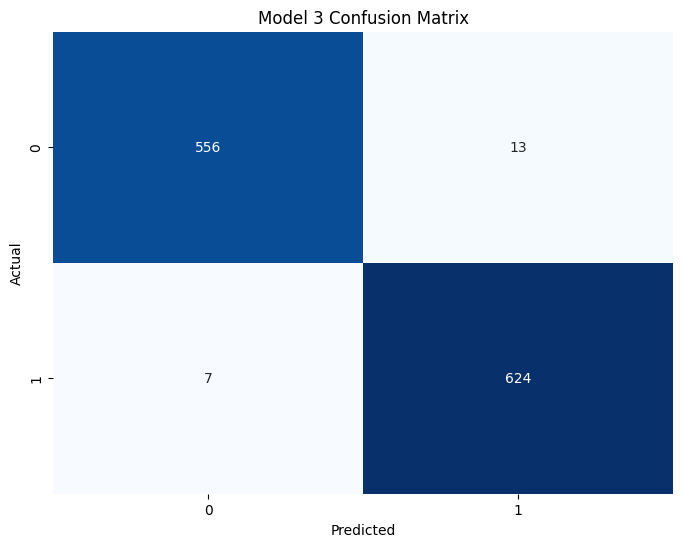

In [32]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Model 3 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [33]:
TN, FP, FN, TP = cm.ravel()
 # Precision: TP / (TP + FP)
precision = TP / (TP + FP)

    # Recall: TP / (TP + FN)
recall = TP / (TP + FN)

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
f1 = 2 * (precision * recall) / (precision + recall)




print("Precision:",precision)
print("Rcall:",recall)
print("F_score:",f1)

Precision: 0.9795918367346939
Rcall: 0.9889064976228209
F_score: 0.9842271293375393


In [34]:
data = {'Model': ['KNN', 'Logistic Regression', 'Decision Tree'],
        'Accuracy': [accuracy_knn, accuracy_lg, accuracy_dt]}
accuracy_df = pd.DataFrame(data)

# Display the DataFrame as a table
print(accuracy_df)

                 Model  Accuracy
0                  KNN  0.977500
1  Logistic Regression  0.936667
2        Decision Tree  0.983333


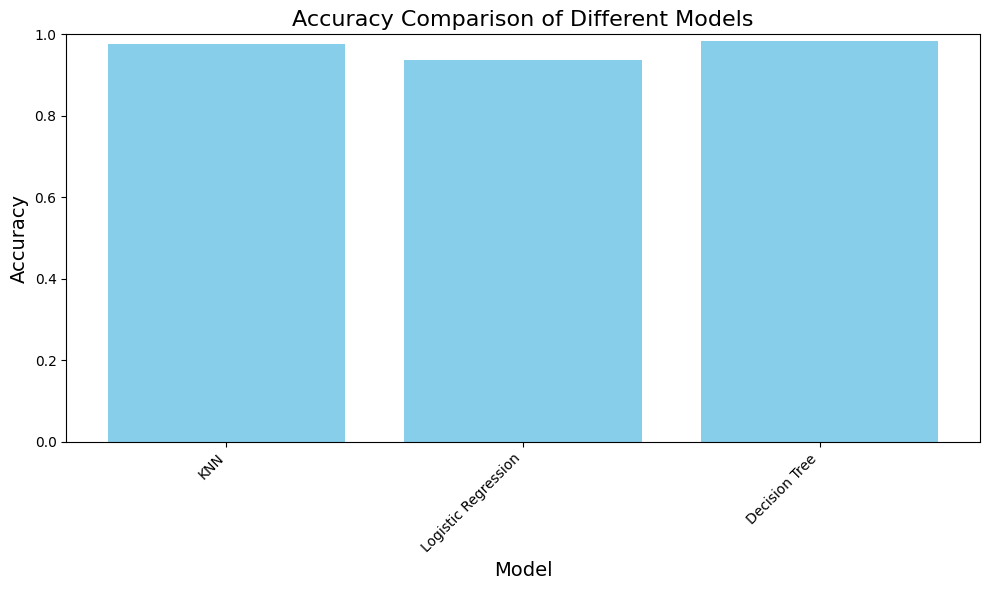

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison of Different Models', fontsize=16)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [36]:
# Sample unseen data with selected columns
unseen_data = {
    'protocol_type': [0, 2],
    'service': [14, 22],
    'flag': [8, 9],
    'src_bytes': [1032, 199],
    'dst_bytes': [0, 420],
    'count': [13, 2],
    'same_srv_rate': [1.00, 0.08], 
    'diff_srv_rate': [0, 0.05],  
    'dst_host_srv_count': [255, 13],  
    'dst_host_same_srv_rate': [1.00, 0]  
}

# Create DataFrame from unseen data
unseen_df = pd.DataFrame(unseen_data)

# Drop the last two rows
# Display the DataFrame with selected columns
print(unseen_df)

   protocol_type  service  flag  src_bytes  dst_bytes  count  same_srv_rate  \
0              0       14     8       1032          0     13           1.00   
1              2       22     9        199        420      2           0.08   

   diff_srv_rate  dst_host_srv_count  dst_host_same_srv_rate  
0           0.00                 255                     1.0  
1           0.05                  13                     0.0  


In [37]:
print('Sample Unseen Data Predictions:')
unseen_pred_knn = model1.predict(unseen_df)
unseen_pred_lr = model2.predict(unseen_df)
unseen_pred_dt = model3.predict(unseen_df)

label_mapping = {1: 'normal', 0: 'attack'}

# Map the numerical labels to 'normal' or 'attack' for each model's predictions
unseen_pred_knn_labels = [label_mapping.get(label, 'unknown') for label in unseen_pred_knn]
unseen_pred_dt_labels = [label_mapping.get(label, 'unknown') for label in unseen_pred_dt]
unseen_pred_lr_labels = [label_mapping.get(label, 'unknown') for label in unseen_pred_lr]

# Display the predictions
prediction={
    'KNN Predictions': unseen_pred_knn_labels,
    'Decision Tree Predictions': unseen_pred_dt_labels,
    'Logistic Regression Predictions': unseen_pred_lr_labels
}
prediction_df=pd.DataFrame(prediction)

print(prediction_df)

Sample Unseen Data Predictions:
  KNN Predictions Decision Tree Predictions Logistic Regression Predictions
0          normal                    attack                          normal
1          attack                    attack                          attack
